# Code Breakdown
- [1 - Packages and Libraries](#1)
- [2 - Importing data](#2)
- [3 - Extracting Features and Target variables](#3)


<a name='1'></a>
# 1 - Packages and Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

<a name='2'></a>
# 2 - Importing data

In [3]:
data = pd.read_csv(".\CareerMapping1.csv")

<a name='3'></a>
# 3 - Extracting Features and Target variables

In [4]:
X = data.drop(['Role','Unnamed: 0'], axis=1)  # Features
y = data['Role']  # Target variable


<a name='4'></a>
# 4 - Use Of Label-Encoder to convert categorical variables into numerical format.

In [5]:
y

0        Database Administrator
1        Database Administrator
2        Database Administrator
3        Database Administrator
4        Database Administrator
                  ...          
10174           Project Manager
10175         Graphics Designer
10176        Software Developer
10177         Hardware Engineer
10178         Helpdesk Engineer
Name: Role, Length: 10179, dtype: object

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

<a name='5'></a>
# 5 - Train Test split. Train -80% Test=20%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a name='6'></a>
# 6 - Applying Random Forest.

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<a name='7'></a>
# 7 - Confusion Matrix.

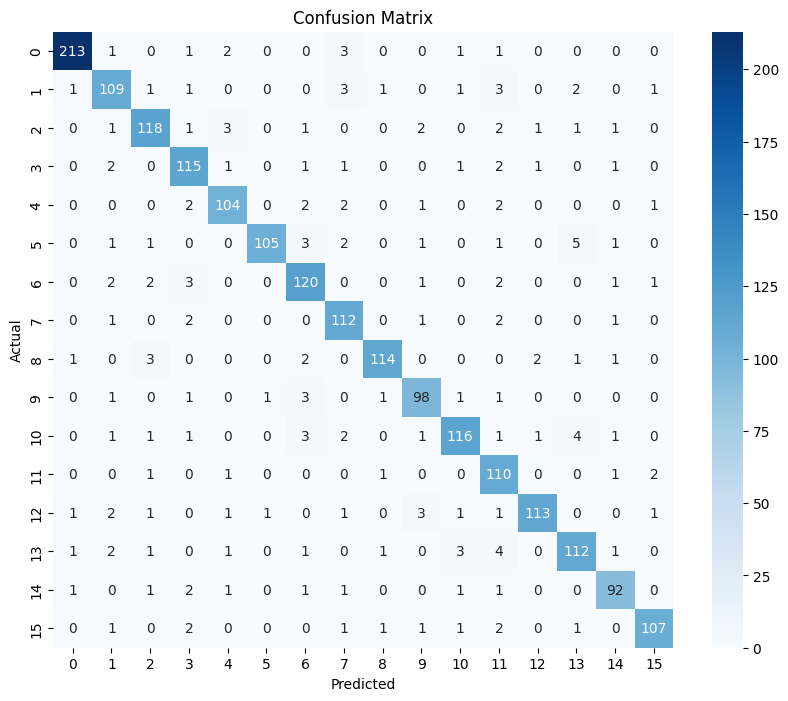

In [9]:
predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<a name='8'></a>
# 8 - Calculating Accuracy, Precision, Recall, f1-score.

In [10]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(classification_report(y_test, predictions))

Accuracy: 0.912573673870334
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       222
           1       0.88      0.89      0.88       123
           2       0.91      0.90      0.90       131
           3       0.88      0.92      0.90       125
           4       0.91      0.91      0.91       114
           5       0.98      0.88      0.93       120
           6       0.88      0.91      0.89       132
           7       0.88      0.94      0.91       119
           8       0.96      0.92      0.94       124
           9       0.90      0.92      0.91       107
          10       0.92      0.88      0.90       132
          11       0.81      0.95      0.88       116
          12       0.96      0.90      0.93       126
          13       0.89      0.88      0.89       127
          14       0.91      0.91      0.91       101
          15       0.95      0.91      0.93       117

    accuracy                           0.91      203

<a name='9'></a>
# 9 - Best Parameter Finding.

In [11]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100,150, 200,250,300],  # Number of trees in the forest
    'max_features': [10,11,12,13,14,15],       # Maximum depth of the trees
    'min_samples_split': [7, 8,9, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [7, 8, 9,10]      # Minimum number of samples required to be at a leaf node
}

# Step 6: Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 7: Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 8: Evaluate the model on the test set using the best hyperparameters
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy with Best Hyperparameters:", accuracy)

KeyboardInterrupt: 